# **Algoritmos: Coloreado de Grafos**

### **Marcos Damián Pool Canul** & **Oscar Manuel Ruiz Reyes**

#### Librerias principales

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, choice, random

#### Solicitar el numero de vertices

In [28]:
# numero_vertices = int(input("Ingrese el número de vértices: "))
# print("Numero de vertices: ", numero_vertices)

numero_vertices = 10

In [29]:
poblacion = 10

#### Funciones principales

In [30]:
def grafo_conectado(numero_vertices):
    """
    Crea un grafo conectado con numero_vertices vértices.
    """
    G = nx.Graph()
    G.add_nodes_from(range(numero_vertices))
    for i in range(numero_vertices - 1):
        G.add_edge(i, i + 1)
    additional_edges = numero_vertices // 2
    for _ in range(additional_edges):
        v1, v2 = randint(0, numero_vertices -
                         1), randint(0, numero_vertices - 1)
        while G.has_edge(v1, v2) or v1 == v2:
            v1, v2 = randint(0, numero_vertices -
                             1), randint(0, numero_vertices - 1)
        G.add_edge(v1, v2)
    return G

In [31]:
def colores_iniciales(G, colores=['red', 'green', 'blue']):
# def colores_iniciales(G, colores=['red', 'green', 'blue', 'yellow']):
    for nodo in G.nodes():
        G.nodes[nodo]['color'] = choice(colores)

    return G

In [32]:
def dibujar_grafo(G, titulo):
    """
    Crea un grafo conectado con numero_vertices vértices.
    """
    plt.figure(figsize=(8, 6))
    # Fija la semilla para la consistencia de posiciones
    posiciones = nx.spring_layout(G, seed=1)
    mapa_colores = [G.nodes[nodo]['color'] for nodo in G.nodes()]
    nx.draw(G, pos=posiciones, with_labels=True,
            node_color=mapa_colores, node_size=500, font_size=10)
    plt.title(titulo)
    plt.show()

In [33]:
def calcular_fitness(G):
    """
    Calcula el fitness de un grafo coloreado, definido como el número de bordes
    que conectan dos nodos del mismo color.
    """
    errores = 0
    for u, v in G.edges():
        if G.nodes[u]['color'] == G.nodes[v]['color']:
            errores += 1
    return errores

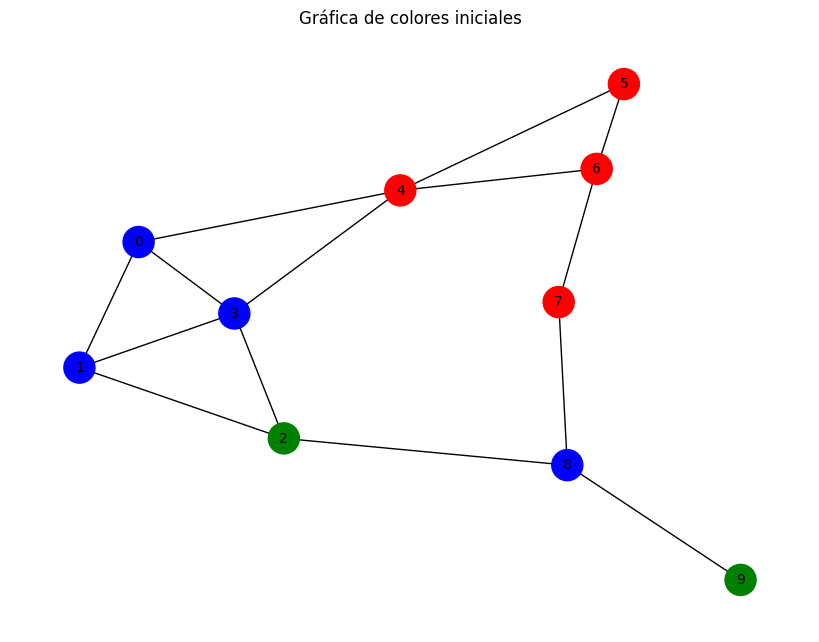

In [34]:
G = grafo_conectado(numero_vertices)
G = colores_iniciales(G)
dibujar_grafo(G, "Gráfica de colores iniciales")

In [35]:
fitness = calcular_fitness(G)
print(f"El fitness (número de errores) del grafo coloreado es: {fitness}")

El fitness (número de errores) del grafo coloreado es: 7


In [36]:
import heapq

# Suponiendo que las funciones grafo_conectado, colores_iniciales, y calcular_fitness están definidas


def generar_poblacion_inicial(numero_vertices, poblacion_size):
    poblacion = {}
    for i in range(poblacion_size):
        G = grafo_conectado(numero_vertices)
        G = colores_iniciales(G)
        fitness = calcular_fitness(G)
        poblacion[(i, fitness)] = G
    return poblacion


def seleccionar_elite(poblacion, n_elite):
    fitness_y_grafos = sorted(poblacion.items(), key=lambda x: x[0][1])
    return fitness_y_grafos[:n_elite]


# Generar la población inicial
numero_vertices = 8  # Ajusta esto según sea necesario
poblacion_size = 100
poblacion = generar_poblacion_inicial(numero_vertices, poblacion_size)

# Seleccionar la élite
n_elite = 10
elite = seleccionar_elite(poblacion, n_elite)

# Mostrar la población completa
print("Población completa:")
for (num_grafo, fitness), G in poblacion.items():
    print(f"Grafo {num_grafo}, Fitness: {fitness}")

# Mostrar la élite
print("\nLos 10 mejores grafos:")
for (num_grafo, fitness), G in elite:
    print(f"Grafo {num_grafo}, Fitness: {fitness}")

Población completa:
Grafo 0, Fitness: 4
Grafo 1, Fitness: 3
Grafo 2, Fitness: 5
Grafo 3, Fitness: 2
Grafo 4, Fitness: 2
Grafo 5, Fitness: 3
Grafo 6, Fitness: 2
Grafo 7, Fitness: 6
Grafo 8, Fitness: 4
Grafo 9, Fitness: 7
Grafo 10, Fitness: 2
Grafo 11, Fitness: 5
Grafo 12, Fitness: 4
Grafo 13, Fitness: 3
Grafo 14, Fitness: 5
Grafo 15, Fitness: 4
Grafo 16, Fitness: 3
Grafo 17, Fitness: 6
Grafo 18, Fitness: 6
Grafo 19, Fitness: 4
Grafo 20, Fitness: 4
Grafo 21, Fitness: 3
Grafo 22, Fitness: 2
Grafo 23, Fitness: 2
Grafo 24, Fitness: 7
Grafo 25, Fitness: 3
Grafo 26, Fitness: 3
Grafo 27, Fitness: 6
Grafo 28, Fitness: 1
Grafo 29, Fitness: 4
Grafo 30, Fitness: 2
Grafo 31, Fitness: 2
Grafo 32, Fitness: 2
Grafo 33, Fitness: 3
Grafo 34, Fitness: 3
Grafo 35, Fitness: 4
Grafo 36, Fitness: 3
Grafo 37, Fitness: 3
Grafo 38, Fitness: 1
Grafo 39, Fitness: 3
Grafo 40, Fitness: 4
Grafo 41, Fitness: 4
Grafo 42, Fitness: 3
Grafo 43, Fitness: 4
Grafo 44, Fitness: 4
Grafo 45, Fitness: 5
Grafo 46, Fitness: 1
Gra

In [37]:
import heapq

# Suponiendo que las funciones grafo_conectado, colores_iniciales, calcular_fitness, y dibujar_grafo están definidas


def generar_poblacion_inicial(numero_vertices, poblacion_size):
    poblacion = {}
    for i in range(poblacion_size):
        G = grafo_conectado(numero_vertices)
        G = colores_iniciales(G)
        fitness = calcular_fitness(G)
        poblacion[i] = {'grafo': G, 'fitness': fitness}
    return poblacion


def seleccionar_elite(poblacion, n_elite):
    poblacion_ordenada = sorted(
        poblacion.items(), key=lambda x: x[1]['fitness'])
    return poblacion_ordenada[:n_elite]


# Generar la población inicial
numero_vertices = 8  # Ajusta esto según sea necesario
poblacion_size = 100
poblacion = generar_poblacion_inicial(numero_vertices, poblacion_size)

# Seleccionar la élite
n_elite = 10
elite = seleccionar_elite(poblacion, n_elite)

# Mostrar la población completa
print("Población completa:")
for num_grafo, info in poblacion.items():
    print(f"Grafo {num_grafo}, Fitness: {info['fitness']}")

# Mostrar la élite
print("\nLos 10 mejores grafos:")
for num_grafo, info in elite:
    print(f"Grafo {num_grafo}, Fitness: {info['fitness']}")

# Función para dibujar un grafo específico


def mostrar_grafo(num_grafo):
    info = poblacion[num_grafo]
    G = info['grafo']
    fitness = info['fitness']
    dibujar_grafo(G, f"Grafo {num_grafo} con Fitness: {fitness}")

Población completa:
Grafo 0, Fitness: 3
Grafo 1, Fitness: 5
Grafo 2, Fitness: 6
Grafo 3, Fitness: 6
Grafo 4, Fitness: 4
Grafo 5, Fitness: 4
Grafo 6, Fitness: 3
Grafo 7, Fitness: 5
Grafo 8, Fitness: 2
Grafo 9, Fitness: 2
Grafo 10, Fitness: 4
Grafo 11, Fitness: 6
Grafo 12, Fitness: 3
Grafo 13, Fitness: 4
Grafo 14, Fitness: 5
Grafo 15, Fitness: 3
Grafo 16, Fitness: 2
Grafo 17, Fitness: 5
Grafo 18, Fitness: 6
Grafo 19, Fitness: 2
Grafo 20, Fitness: 5
Grafo 21, Fitness: 3
Grafo 22, Fitness: 2
Grafo 23, Fitness: 3
Grafo 24, Fitness: 2
Grafo 25, Fitness: 4
Grafo 26, Fitness: 2
Grafo 27, Fitness: 3
Grafo 28, Fitness: 4
Grafo 29, Fitness: 7
Grafo 30, Fitness: 5
Grafo 31, Fitness: 7
Grafo 32, Fitness: 4
Grafo 33, Fitness: 5
Grafo 34, Fitness: 1
Grafo 35, Fitness: 2
Grafo 36, Fitness: 4
Grafo 37, Fitness: 1
Grafo 38, Fitness: 4
Grafo 39, Fitness: 3
Grafo 40, Fitness: 1
Grafo 41, Fitness: 4
Grafo 42, Fitness: 5
Grafo 43, Fitness: 2
Grafo 44, Fitness: 3
Grafo 45, Fitness: 4
Grafo 46, Fitness: 4
Gra

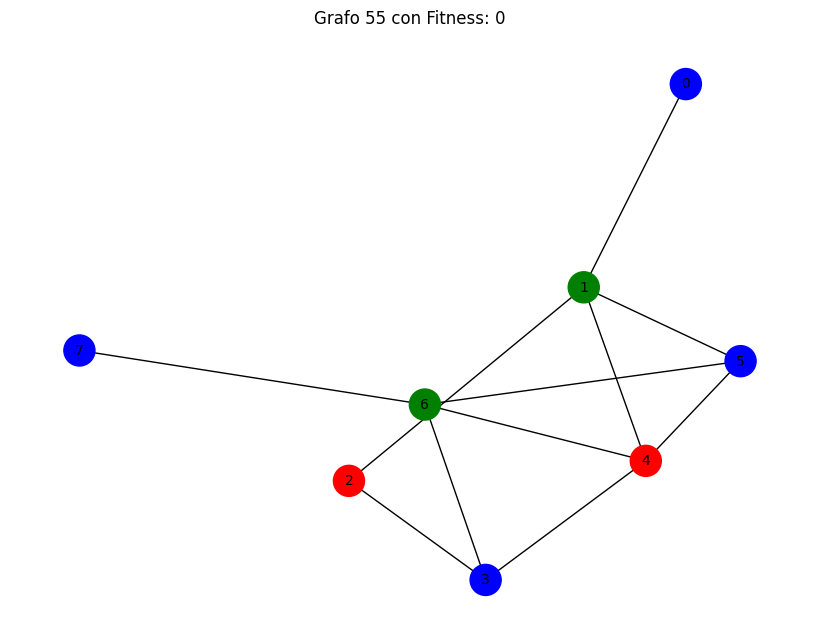

In [38]:
mostrar_grafo(55)